### Purpose: plot the spectra anisotropy matrix sum (SAMS) against the quadrupole anisotropy matrix sum (QAMS)

Import Dependencies

In [13]:
import json
import pprint
import os
import sys

sys.path.append(os.path.abspath(".."))
import helpers  # Import the helpers module from the parent directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pd.set_option('display.max_columns', 10)

import importlib
importlib.reload(helpers) #Reload helpers if necessary

<module 'helpers' from '/Users/John/Desktop/University of Washington/Seidler lab/Factor_Dictionary/helpers.py'>

#### Remove all Factor dfs that do not have an oxidation state

#### Load up Qm and Dm Aniso dfs

In [14]:
NiO_stretched = "Stretched_Structures/NiO_Stretched_04172025"
Cr2O3_stretched = "Stretched_Structures/Cr2O3_Stretched_04172025"
Cr_oxide_fd_path = "Cr_oxide_data/Cr_oxide_fd_4_2_2025"
test_for_big_dataset = "../transformed_data/test_for_big_dataset/factor_df_6_7_2025"

normalization_orders = [7]

factor_df, spectra_df = helpers.generate_factor_spectra_df(test_for_big_dataset, mat_props = True, dipole = True, quadrupole = True, steinhart=True, normalization_orders=normalization_orders, ox = False, spectra = True)


print(factor_df)

Data list length: 269
['Material', 'Chem Formula', 'Cif Name', 'Central Atom', 'Space Group Number', 'Average Bond Length', 'Bond Length Std', 'Average Bond Angle', 'Bond Angle Std', 'Number of Unique Ligands', 'Average Electronegativity', 'Std Electronegativity', 'Band Gap', 'Density', 'Oxidation States', 'DM Norm 1/r^7 0', 'DM Norm 1/r^7 1', 'DM Norm 1/r^7 2', 'Aniso DM 1/r^7 0', 'Aniso DM 1/r^7 1', 'Aniso DM 1/r^7 2', 'Aniso DM 1/r^7 3', 'Aniso DM 1/r^7 4', 'Aniso DM 1/r^7 5', 'Aniso DM 1/r^7 6', 'Aniso DM 1/r^7 7', 'Aniso DM 1/r^7 8', 'Aniso Sum DM 1/r^7', 'QM Norm 1/r^7 0', 'QM Norm 1/r^7 1', 'QM Norm 1/r^7 2', 'QM Norm 1/r^7 3', 'QM Norm 1/r^7 4', 'QM Norm 1/r^7 5', 'QM Norm 1/r^7 6', 'QM Norm 1/r^7 7', 'QM Norm 1/r^7 8', 'Aniso QM 1/r^7 0', 'Aniso QM 1/r^7 1', 'Aniso QM 1/r^7 2', 'Aniso QM 1/r^7 3', 'Aniso QM 1/r^7 4', 'Aniso QM 1/r^7 5', 'Aniso QM 1/r^7 6', 'Aniso QM 1/r^7 7', 'Aniso QM 1/r^7 8', 'Aniso Sum QM 1/r^7']
           Chem Formula Cif Name Central Atom  Space Group N

#### Clean and allign dfs

In [15]:
factor_df, spectra_df, dropped_factor_df = helpers.align_dataframes(factor_df, spectra_df)

Dropped duplicate indices:
Empty DataFrame
Columns: [Chem Formula, Cif Name, Central Atom, Space Group Number, Average Bond Length, Bond Length Std, Average Bond Angle, Bond Angle Std, Number of Unique Ligands, Average Electronegativity, Std Electronegativity, Band Gap, Density, Oxidation States, DM Norm 1/r^7 0, DM Norm 1/r^7 1, DM Norm 1/r^7 2, Aniso DM 1/r^7 0, Aniso DM 1/r^7 1, Aniso DM 1/r^7 2, Aniso DM 1/r^7 3, Aniso DM 1/r^7 4, Aniso DM 1/r^7 5, Aniso DM 1/r^7 6, Aniso DM 1/r^7 7, Aniso DM 1/r^7 8, Aniso Sum DM 1/r^7, QM Norm 1/r^7 0, QM Norm 1/r^7 1, QM Norm 1/r^7 2, QM Norm 1/r^7 3, QM Norm 1/r^7 4, QM Norm 1/r^7 5, QM Norm 1/r^7 6, QM Norm 1/r^7 7, QM Norm 1/r^7 8, Aniso QM 1/r^7 0, Aniso QM 1/r^7 1, Aniso QM 1/r^7 2, Aniso QM 1/r^7 3, Aniso QM 1/r^7 4, Aniso QM 1/r^7 5, Aniso QM 1/r^7 6, Aniso QM 1/r^7 7, Aniso QM 1/r^7 8, Aniso Sum QM 1/r^7]
Index: []

[0 rows x 46 columns]

Dropped due to NaN entries:
Empty DataFrame
Columns: [Chem Formula, Cif Name, Central Atom, Space Gr

### Compute off diagonal sum of SAM

In [29]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df, normalize=True)

### Normalize the QAMS by largest QAMS

In [44]:
factor_df["Aniso Sum QM 1/r^7"] = factor_df["Aniso Sum QM 1/r^7"] / factor_df["Aniso Sum QM 1/r^7"].max()


#### Display dfs

In [45]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("spectra_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Chem Formula Cif Name Central Atom  Space Group Number  \
Material                                                            
mp-1024044      Unknown  Unknown           Cr                 221   
mp-1030818      Unknown  Unknown           Cr                 123   
mp-1030883      Unknown  Unknown           Cr                 123   
mp-1031027      Unknown  Unknown           Cr                 123   
mp-1031245      Unknown  Unknown           Cr                 123   

            Average Bond Length  ...  Aniso QM 1/r^7 6  Aniso QM 1/r^7 7  \
Material                         ...                                       
mp-1024044                    0  ...      4.857226e-17      2.775558e-17   
mp-1030818                    0  ...      5.123593e-02      5.123593e-02   
mp-1030883                    0  ...      2.060134e-02      2.060134e-02   
mp-1031027                    0  ...      3.593377e-02      3.593377e-02   
mp-1031245                    0  ...      2.111775

#### Get space groups

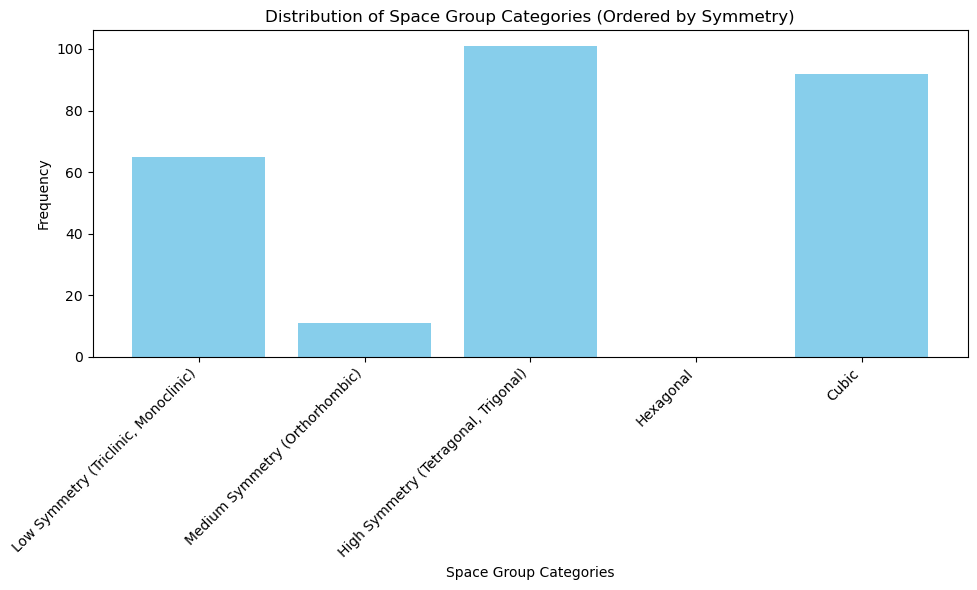

In [46]:
def generate_spacegroup_dict_from_df(factor_df):
    """
    Generate a dictionary mapping MP-ID to space groups and their categories from a factor DataFrame.

    Parameters:
        factor_df (pd.DataFrame): DataFrame containing 'MP-ID' and 'Space Group Number'.

    Returns:
        dict: A dictionary where keys are MP-IDs and values are tuples of (space group number, category).
    """
    
    def group_space_group(space_group_number):
        """Categorizes space groups based on symmetry level."""
        if 1 <= space_group_number <= 15:
            return "Low Symmetry (Triclinic, Monoclinic)"
        elif 16 <= space_group_number <= 74:
            return "Medium Symmetry (Orthorhombic)"
        elif 75 <= space_group_number <= 167:
            return "High Symmetry (Tetragonal, Trigonal)"
        elif 168 <= space_group_number <= 194:
            return "Hexagonal"
        elif 195 <= space_group_number <= 230:
            return "Cubic"
        else:
            return "Unknown"

    # Extract MP-ID and Space Group Number
    spacegroup_dict = {}
    
    for mp_id, row in factor_df.iterrows():
        space_group_number = row["Space Group Number"]
        category = group_space_group(space_group_number)
        spacegroup_dict[mp_id] = (space_group_number, category)

    return spacegroup_dict

def plot_space_group_distribution(spacegroup_dict):
    """
    Plot the distribution of space group categories, ordered from least to most symmetric.

    Parameters:
        spacegroup_dict (dict): A dictionary where values are tuples of (space group number, category).
    """
    # Extract categories from the dictionary
    categories = [group for _, group in spacegroup_dict.values()]

    # Count occurrences of each category
    category_counts = {}
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

    # Define custom order: least to most symmetric
    custom_order = [
        "Low Symmetry (Triclinic, Monoclinic)",
        "Medium Symmetry (Orthorhombic)",
        "High Symmetry (Tetragonal, Trigonal)",
        "Hexagonal",
        "Cubic",
    ]

    # Sort categories by the custom order
    ordered_counts = {cat: category_counts.get(cat, 0) for cat in custom_order}

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(ordered_counts.keys(), ordered_counts.values(), color="skyblue")
    plt.xlabel("Space Group Categories")
    plt.ylabel("Frequency")
    plt.title("Distribution of Space Group Categories (Ordered by Symmetry)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

space_group = generate_spacegroup_dict_from_df(factor_df)
plot_space_group_distribution(space_group)

### Create a df for a specific space group

In [47]:
def get_group_df(low , high, factor_df, normalization):
    
    group = {}

    for key, value in space_group.items():
        if low < value[0] < high:
            group[key] = value  # Store the entire value list/tuple

    # Convert dictionary to DataFrame
    group_df = pd.DataFrame.from_dict(group, orient='index')

    # Name columns
    group_df.columns = ["Space Group", "Group Name"]

    # Name the index
    group_df.index.name = "Materials"

    # Find the intersection of indexes with factor dict
    common_indexes = group_df.index.intersection(factor_df.index)

    # Extract the "Aniso Sum QM" column for the common indexes
    qm_aniso_sum = factor_df.loc[common_indexes, f"Aniso Sum QM {normalization}"]

    # Add the extracted column to group_df
    group_df.loc[common_indexes, f"Aniso Sum QM {normalization}"] = qm_aniso_sum

    # Find the intersection of indexes with sepctra df
    common_indexes = group_df.index.intersection(spectra_df.index)

    # Extract the "Aniso Sum QM" column for the common indexes
    spectra_aniso_sum = spectra_df.loc[common_indexes, "Anisotropy Matrix Sum"]

    # Add the extracted column to group_df
    group_df.loc[common_indexes, "Normed Spectra Aniso Sum"] = spectra_aniso_sum

    # Add a column for the difference between the last two columns
    group_df["Difference Aniso Sum"] = np.abs(group_df[f"Aniso Sum QM {normalization}"] - group_df["Normed Spectra Aniso Sum"])

    return group_df

#### Plot the SAMS v QMAS

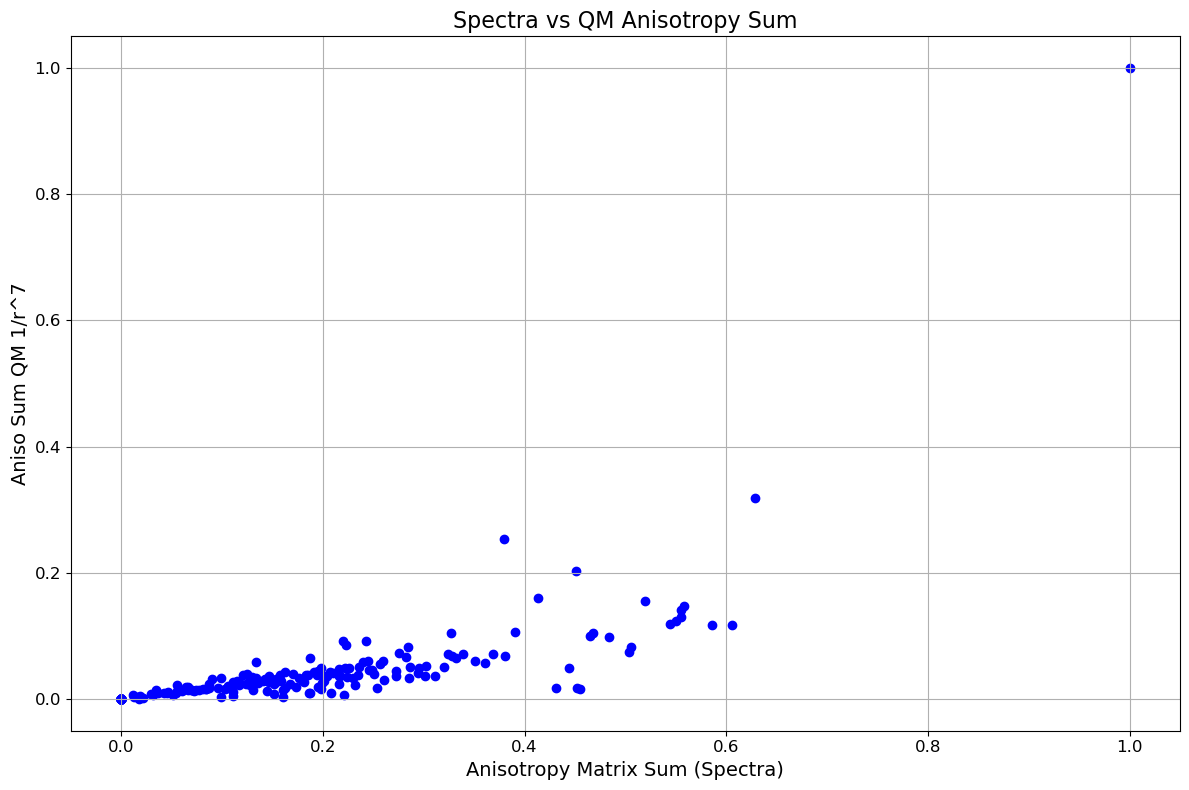

In [48]:
def plot_spectra_vs_qm_aniso(factor_df, spectra_df, title="Spectra vs QM Anisotropy Sum", labels=True):
    """
    Plots Spectra anisotropy sum vs QM anisotropy sum for aligned materials,
    optionally annotating each point with the material/index.

    Parameters:
        factor_df (pd.DataFrame): DataFrame containing 'Aniso Sum QM 1/r^7'.
        spectra_df (pd.DataFrame): DataFrame containing 'Anisotropy Matrix Sum'.
        title (str): Plot title.
        labels (bool): Whether to annotate each point with its index.

    Returns:
        None
    """
    # Align by index to ensure both have the same materials in same order
    aligned_factor, aligned_spectra = factor_df.align(spectra_df, join='inner', axis=0)
    qm_aniso_sum = aligned_factor['Aniso Sum QM 1/r^7'].values
    spectra_aniso_sum = aligned_spectra['Anisotropy Matrix Sum'].values

    plt.figure(figsize=(12, 8))
    plt.scatter(spectra_aniso_sum, qm_aniso_sum, color='blue')

    if labels:
        for i, mpid in enumerate(aligned_factor.index):
            plt.annotate(mpid, 
                         (spectra_aniso_sum[i], qm_aniso_sum[i]), 
                         fontsize=10,
                         alpha=0.75)

    plt.xlabel('Anisotropy Matrix Sum (Spectra)', fontsize=14)
    plt.ylabel('Aniso Sum QM 1/r^7', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_spectra_vs_qm_aniso(factor_df, spectra_df, labels=False)


            m00           m01       m02           m10  m11           m12  \
Material                                                                   
mp-1024044  0.0  4.703233e-06  0.000005  4.703233e-06  0.0  3.302534e-07   
mp-1030818  0.0  1.708919e-07  0.051754  1.708919e-07  0.0  5.175442e-02   
mp-1030883  0.0  1.850886e-07  0.035395  1.850886e-07  0.0  3.539488e-02   
mp-1031027  0.0  1.362048e-07  0.034190  1.362048e-07  0.0  3.418967e-02   
mp-1031245  0.0  1.706878e-07  0.042011  1.706878e-07  0.0  4.201097e-02   
...         ...           ...       ...           ...  ...           ...   
mp-798760   0.0  6.880188e-02  0.068837  6.880188e-02  0.0  5.287447e-02   
mp-801251   0.0  6.292841e-02  0.059548  6.292841e-02  0.0  3.769872e-02   
mp-849774   0.0  8.021089e-02  0.084569  8.021089e-02  0.0  9.833729e-03   
mp-866101   0.0  4.072945e-07  0.000004  4.072945e-07  0.0  3.845003e-06   
mp-996996   0.0  3.315647e-02  0.033157  3.315647e-02  0.0  3.684468e-06   

           

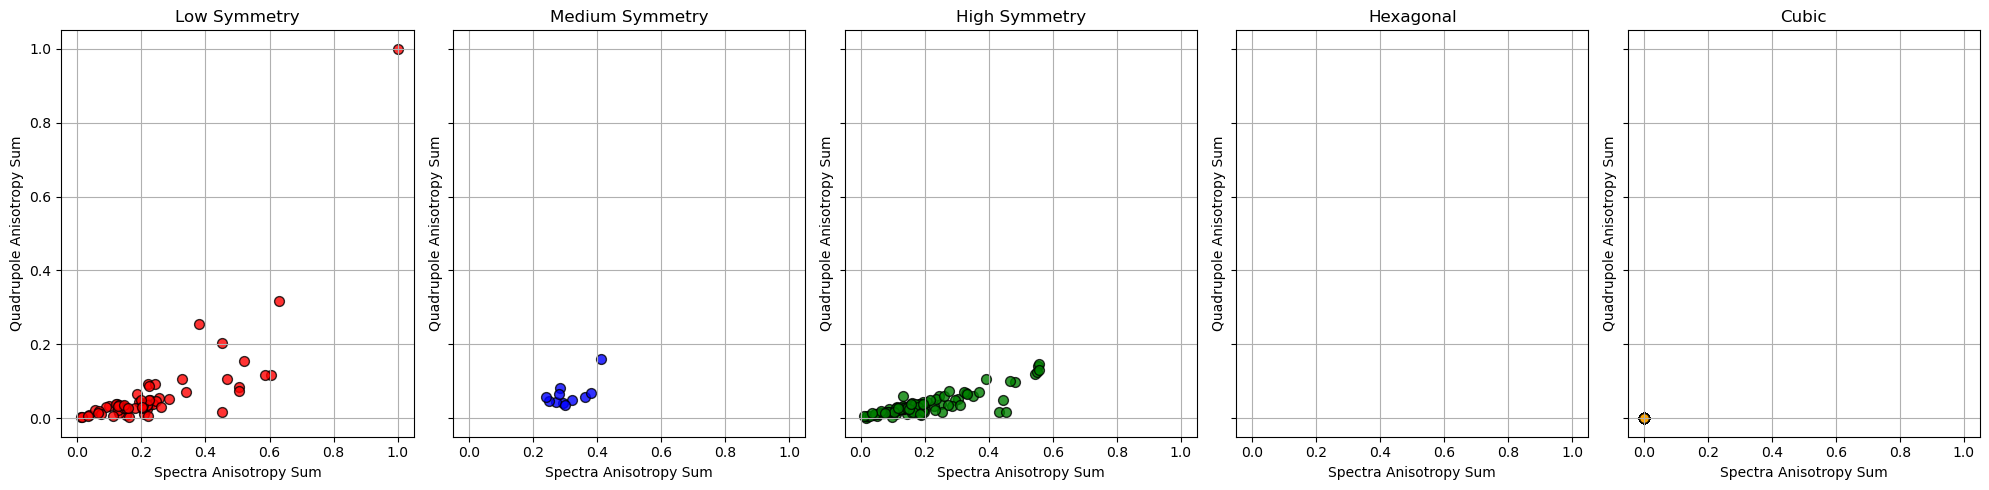

In [49]:
def plot_qm_vs_spectra_by_group(factor_df, spectra_df):
    """
    Create separate scatter plots for each space group category.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum QM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    qm_aniso_sum = factor_df['Aniso Sum QM 1/r^7'].values
    spectra_aniso_sum = spectra_df['Anisotropy Matrix Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return "Low Symmetry"
        elif 16 <= sg <= 74:
            return "Medium Symmetry"
        elif 75 <= sg <= 167:
            return "High Symmetry"
        elif 168 <= sg <= 194:
            return "Hexagonal"
        elif 195 <= sg <= 230:
            return "Cubic"
        return "Unknown"

    # Assign categories
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define colors for each category
    category_colors = {
        "Low Symmetry": "red",
        "Medium Symmetry": "blue",
        "High Symmetry": "green",
        "Hexagonal": "purple",
        "Cubic": "orange",
    }

    # Get unique categories
    unique_categories = list(category_colors.keys())

    # Create subplots for each category
    fig, axes = plt.subplots(1, len(unique_categories), figsize=(20, 5), sharex=True, sharey=True)

    for ax, category in zip(axes, unique_categories):
        # Filter data for the current category
        mask = space_group_classes == category
        ax.scatter(spectra_aniso_sum[mask], qm_aniso_sum[mask], color=category_colors[category], s=50, edgecolor='k', alpha=0.8)

        # Titles and labels
        ax.set_title(category)
        ax.set_xlabel("Spectra Anisotropy Sum")
        ax.set_ylabel("Quadrupole Anisotropy Sum")
        ax.grid(True)

    # Overall layout
    plt.tight_layout()
    plt.show()


print(spectra_df)

# Example usage:
plot_qm_vs_spectra_by_group(factor_df, spectra_df)

In [50]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

def plot_qm_vs_spectra_grouped(factor_df, spectra_df, labels=False):
    """
    Plot QM anisotropy sum vs Spectra anisotropy sum with 5 distinct colors 
    based on space group classification, and annotate each point with 
    the corresponding 'Material' value from spectra_df.

    Args:
        factor_df (pd.DataFrame): Contains 'Aniso Sum QM 1/r^7', 
                                  'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'Anisotropy Matrix Sum', 
                                   and is indexed by 'Material'.
        labels (bool): Whether to annotate each point with the material name.
    """

    # Extract values
    qm_aniso_sum = factor_df['Aniso Sum QM 1/r^7'].values
    spectra_aniso_sum = spectra_df['Off Diagonal Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return 0  # Low Symmetry
        elif 16 <= sg <= 74:
            return 1  # Medium Symmetry
        elif 75 <= sg <= 167:
            return 2  # High Symmetry
        elif 168 <= sg <= 194:
            return 3  # Hexagonal
        elif 195 <= sg <= 230:
            return 4  # Cubic
        return -1   # Unknown

    # Apply classification
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define color mapping
    category_color_map = {
        0: "red",      # Low Symmetry
        1: "blue",     # Medium Symmetry
        2: "green",    # High Symmetry
        3: "purple",   # Hexagonal
        4: "orange"    # Cubic
    }

    category_labels = [
        "Low Symmetry",
        "Medium Symmetry",
        "High Symmetry",
        "Hexagonal",
        "Cubic"
    ]

    # Map colors to each point
    point_colors = [category_color_map.get(c, "gray") for c in space_group_classes]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(
        spectra_aniso_sum, 
        qm_aniso_sum, 
        s=50, 
        edgecolor='k', 
        alpha=0.8
    )

    # Add labels if requested
    if labels:
        for i, material_name in enumerate(spectra_df.index):
            plt.annotate(
                material_name,
                xy=(spectra_aniso_sum[i], qm_aniso_sum[i]),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8
            )

    '''
    # Custom legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=category_color_map[idx], markersize=8)
        for idx, label in enumerate(category_labels)
    ]
    '''
    '''
    plt.legend(
        handles=legend_elements,
        title="Space Group Categories",
        loc="lower right",
        bbox_to_anchor=(1, 0),
        borderaxespad=0
    )
    '''

    # Final plot tweaks
    plt.xlabel('Spectra Anisotropy Matrix Sum (SAMS)', fontsize = 12)
    plt.ylabel('Quadrupole Anisotropy Matrix Sum (QAMS)', fontsize = 12)
    plt.title('QAMS vs SAMS (Stretched Cr2O3)', fontsize = 20)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_qm_vs_spectra_grouped(factor_df,spectra_df)

KeyError: 'Off Diagonal Sum'

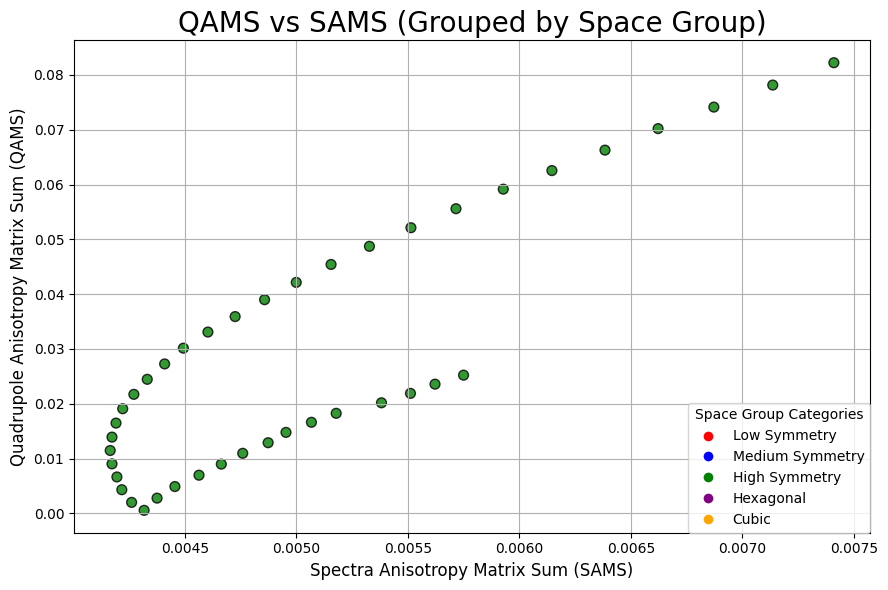

In [ ]:
def plot_qm_vs_spectra_grouped(factor_df, spectra_df, labels=False, label_only=None, offset_map = {}):
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from adjustText import adjust_text
    import numpy as np

    qm_aniso_sum = factor_df['Aniso Sum QM 1/r^7'].values
    spectra_aniso_sum = spectra_df['Off Diagonal Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    def classify_space_group(sg):
        if 1 <= sg <= 15: return 0
        elif 16 <= sg <= 74: return 1
        elif 75 <= sg <= 167: return 2
        elif 168 <= sg <= 194: return 3
        elif 195 <= sg <= 230: return 4
        return -1

    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])
    category_color_map = {0: "red", 1: "blue", 2: "green", 3: "purple", 4: "orange"}
    category_labels = ["Low Symmetry", "Medium Symmetry", "High Symmetry", "Hexagonal", "Cubic"]
    point_colors = [category_color_map.get(c, "gray") for c in space_group_classes]

    plt.figure(figsize=(9, 6))
    plt.scatter(spectra_aniso_sum, qm_aniso_sum, c=point_colors, s=50, edgecolor='k', alpha=0.8)


    if labels:
        texts = []
        for i, name in enumerate(spectra_df.index):
            if label_only is None or name in label_only:
                dx, dy = offset_map.get(name, (0.002, 0.002))  # Default if not found
                plt.annotate(
                    name,
                    xy=(spectra_aniso_sum[i], qm_aniso_sum[i]),
                    xytext=(spectra_aniso_sum[i] + dx, qm_aniso_sum[i] + dy),
                    fontsize=8,
                    arrowprops=dict(arrowstyle='-', lw=0.5, color='gray')
                )



    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=category_color_map[idx], markersize=8)
        for idx, label in enumerate(category_labels)
    ]
    plt.legend(handles=legend_elements, title="Space Group Categories",
               loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0)
    plt.xlabel('Spectra Anisotropy Matrix Sum (SAMS)', fontsize=12)
    plt.ylabel('Quadrupole Anisotropy Matrix Sum (QAMS)', fontsize=12)
    plt.title('QAMS vs SAMS (Grouped by Space Group)', fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


label_only_Cr2O3 = ["Cr2O3_stretch_-10.0_c","Cr2O3_stretch_-7.5_c","Cr2O3_stretch_-5.0_c",
              "Cr2O3_stretch_-2.5_c","Cr2O3_stretch_0.0_c","Cr2O3_stretch_2.5_c","Cr2O3_stretch_5.0_c",
              "Cr2O3_stretch_5.0_c","Cr2O3_stretch_7.5_c","Cr2O3_stretch_10.0_c"]

offset_map_Cr2O3 = {
    "Cr2O3_stretch_-10.0_c": (-0.06, -0.008),
    "Cr2O3_stretch_-7.5_c":  (0.003, -0.004),
    "Cr2O3_stretch_-5.0_c":  (0.003, -0.003),
    "Cr2O3_stretch_-2.5_c":  (0.017, -0.002),
    "Cr2O3_stretch_0.0_c":   (0.017, -0.001),
    "Cr2O3_stretch_2.5_c":   (0.03,  -0.004),
    "Cr2O3_stretch_5.0_c":   (0.018, -0.003),
    "Cr2O3_stretch_7.5_c":   (0.01, -0.005),
    "Cr2O3_stretch_10.0_c":  (0.003, -0.003)
}


label_only_NiO = ["NiO_stretch_0.0_a","NiO_stretch_0.0_b","NiO_stretch_0.0_c",
                  "NiO_stretch_2.5_a","NiO_stretch_2.5_b","NiO_stretch_2.5_c",
                  "NiO_stretch_5.0_a","NiO_stretch_5.0_b","NiO_stretch_5.0_c",]

offset_map_NiO = {
    # 0.0 — RIGHT
    "NiO_stretch_0.0_a": (0.004, 0.002),
    "NiO_stretch_0.0_b": (0.004, 0.000),
    "NiO_stretch_0.0_c": (0.004, -0.002),

    # 2.5 — SPREAD AROUND
    "NiO_stretch_2.5_a": (-0.004, 0.002),   # top
    "NiO_stretch_2.5_b": (0.004, 0.000),    # middle, right
    "NiO_stretch_2.5_c": (-0.004, -0.002),  # bottom

    # 5.0 — LEFT
    "NiO_stretch_5.0_a": (-0.180, 0.002),
    "NiO_stretch_5.0_b": (-0.180, 0.000),
    "NiO_stretch_5.0_c": (-0.180, -0.002),
}




plot_qm_vs_spectra_grouped(factor_df, spectra_df, labels=True, label_only = label_only_NiO, offset_map = offset_map_NiO)
